In [48]:
from __future__ import print_function, division

import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion() 

In [8]:
inputs = torch.rand(1000,35)
labels = torch.ones(len(inputs))
for i in range(len(labels)):
    ran = random.random()
    labels[i] = round(ran)
labels= torch.unsqueeze(labels, dim=1)
print(inputs[0],labels[0])

tensor([0.1106, 0.4582, 0.5773, 0.0460, 0.9334, 0.4876, 0.0555, 0.0848, 0.8333,
        0.2409, 0.9206, 0.4718, 0.1766, 0.8946, 0.4036, 0.7336, 0.3897, 0.1810,
        0.0802, 0.5344, 0.8158, 0.4293, 0.1314, 0.3705, 0.1901, 0.8256, 0.3053,
        0.5085, 0.6198, 0.0739, 0.2064, 0.5170, 0.2022, 0.8341, 0.1453]) tensor([0.])


In [158]:
i_length = len(inputs[0])
o_length = len(y[0])
net = torch.nn.Sequential(
    torch.nn.Linear(i_length, i_length*10),
#     torch.nn.Softmax(),
    torch.nn.Linear(i_length*10, i_length*5),
    torch.nn.ReLU(),
    torch.nn.Linear(i_length*5, o_length)
)

print(net)  # net 的结构
"""
Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)
"""

Sequential(
  (0): Linear(in_features=35, out_features=350, bias=True)
  (1): Linear(in_features=350, out_features=175, bias=True)
  (2): ReLU6()
  (3): Linear(in_features=175, out_features=1, bias=True)
)


'\nNet (\n  (hidden): Linear (1 -> 10)\n  (predict): Linear (10 -> 1)\n)\n'

In [144]:
print(net(inputs).size())

torch.Size([1000, 1])


In [162]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

since = time.time()
num_epochs = 100
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)
    prediction = net(inputs)     # 喂给 net 训练数据 x, 输出预测值

    loss = loss_func(prediction, labels)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
#     loss.backward()         # 误差反向传播, 计算参数更新值
#     optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
#     # statistics
#     running_loss += loss.item() * inputs.size(0)
#     running_corrects += torch.sum(prediction == labels.data)

#     epoch_loss = running_loss / dataset_sizes[phase]
#     epoch_acc = running_corrects.double() / dataset_sizes[phase]

# time_elapsed = time.time() - since
# print('Training complete in {:.0f}m {:.0f}s'.format(
#     time_elapsed // 60, time_elapsed % 60))
# print('Best val Acc: {:4f}'.format(best_acc))

Epoch 0/99
----------
Epoch 1/99
----------
Epoch 2/99
----------
Epoch 3/99
----------
Epoch 4/99
----------
Epoch 5/99
----------
Epoch 6/99
----------
Epoch 7/99
----------
Epoch 8/99
----------
Epoch 9/99
----------
Epoch 10/99
----------
Epoch 11/99
----------
Epoch 12/99
----------
Epoch 13/99
----------
Epoch 14/99
----------
Epoch 15/99
----------
Epoch 16/99
----------
Epoch 17/99
----------
Epoch 18/99
----------
Epoch 19/99
----------
Epoch 20/99
----------
Epoch 21/99
----------
Epoch 22/99
----------
Epoch 23/99
----------
Epoch 24/99
----------
Epoch 25/99
----------
Epoch 26/99
----------
Epoch 27/99
----------
Epoch 28/99
----------
Epoch 29/99
----------
Epoch 30/99
----------
Epoch 31/99
----------
Epoch 32/99
----------
Epoch 33/99
----------
Epoch 34/99
----------
Epoch 35/99
----------
Epoch 36/99
----------
Epoch 37/99
----------
Epoch 38/99
----------
Epoch 39/99
----------
Epoch 40/99
----------
Epoch 41/99
----------
Epoch 42/99
----------
Epoch 43/99
---------

In [163]:
print(prediction)

tensor([[0.4562],
        [0.4436],
        [0.5003],
        [0.5145],
        [0.5529],
        [0.4606],
        [0.4685],
        [0.4635],
        [0.4980],
        [0.4186],
        [0.4959],
        [0.4659],
        [0.4189],
        [0.4566],
        [0.4779],
        [0.5354],
        [0.4814],
        [0.4852],
        [0.4926],
        [0.4211],
        [0.4720],
        [0.5109],
        [0.4703],
        [0.4962],
        [0.4076],
        [0.4606],
        [0.4781],
        [0.4477],
        [0.4956],
        [0.4839],
        [0.4631],
        [0.4622],
        [0.4934],
        [0.4789],
        [0.4778],
        [0.5053],
        [0.5113],
        [0.4361],
        [0.4982],
        [0.5349],
        [0.4446],
        [0.5469],
        [0.4250],
        [0.4662],
        [0.5471],
        [0.4510],
        [0.5600],
        [0.5021],
        [0.4796],
        [0.4299],
        [0.4770],
        [0.4317],
        [0.5399],
        [0.5288],
        [0.4027],
        [0

In [117]:
model_dict = net.state_dict()

In [135]:
def get_print_tensor(tensor):
    if tensor.dim() < 2:
        return str(tensor.tolist() )
    else:
        t_str = "["
        for i in range(tensor.size()[0]):
            t_str += get_print_tensor(tensor[i]) + ",\n"
        t_str = t_str[:-2]
        t_str += "]"
        return t_str

In [166]:
import io
import json

fo = open("sc_nn_pytorch.model","w+")

for i in model_dict:
    if type(model_dict[i]) is torch.Tensor:
        structure = "dict[%s]=" % i
        fo.write(structure + "\n")
        fo.write(str(model_dict[i].size()) + "\n")
        fo.write(get_print_tensor(model_dict[i]))
        fo.write("\n")
fo.close()

In [110]:
tensor = torch.rand(1,5)
print(tensor.size()[0])

1


In [141]:
type(net)

torch.nn.modules.container.Sequential

In [73]:
###
###   统计Frame相关
###
import mysql.connector

cnx = mysql.connector.Connect (host = "localhost",
                              port = 3306,
                              user = "root",
                              passwd = "paofan8",
                              db = "starcraft_tvt")
result = []
result_count=0
result_mean = 0
result_min = 0
result_max = 0

cursor = cnx.cursor()
cursor.execute ("SELECT Duration FROM replay")
rows = cursor.fetchall()
for row in rows:
    result.append(row[0])

cursor.execute ("SELECT avg(Duration) FROM replay")
result_mean = cursor.fetchone()[0]
cursor.execute ("SELECT min(Duration) FROM replay")
result_min = cursor.fetchone()[0]
cursor.execute ("SELECT max(Duration) FROM replay")
result_max = cursor.fetchone()[0]
cursor.execute ("SELECT count(Duration) FROM replay")
result_count = cursor.fetchone()[0]


cursor.close()
cnx.close()
print(result[0])
print(result_mean)
print(result_min)
print(result_max)
print(result_count)

58147
39942.1291
5506
136382
395


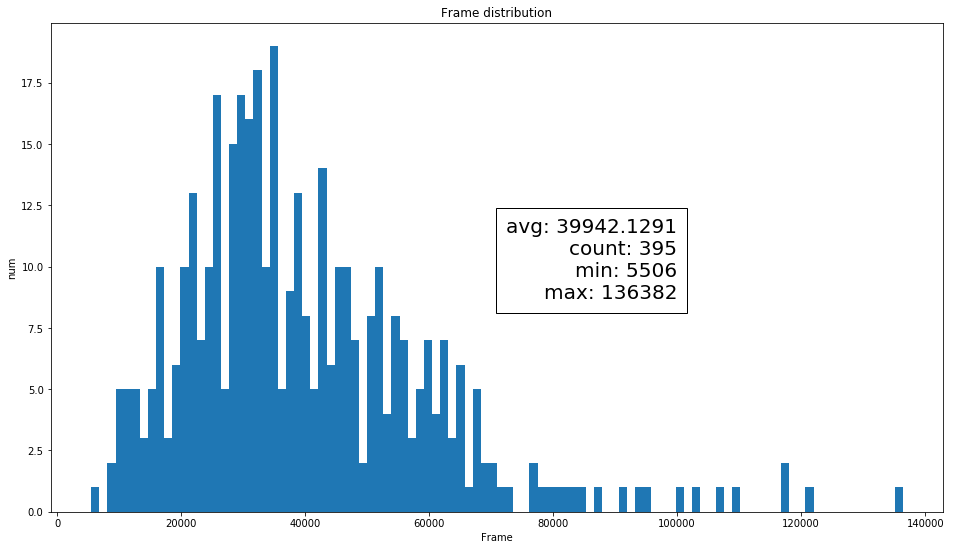

In [75]:
#hist-plot for frame stats
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
ax.hist(result, bins=100)
#some stats
stats = "avg: {}\ncount: {}\nmin: {}\nmax: {}".format(result_mean,result_count,result_min,result_max)
plt.text(100000,12,stats,fontsize=20,ha='right',va='top',bbox=dict(boxstyle='square,pad=0.5',fc='w',ec='k',lw=1))

plt.title('Frame distribution')
plt.xlabel('Frame')
plt.ylabel('num')
plt.savefig("frame.png")
plt.show()

In [43]:
###
###   添加建筑价位表
###
import mysql.connector
from mysql.connector import errorcode

DB_NAME = "starcraft_tvt"
TABLES = {}
TABLES['unitscore'] = (
    " CREATE TABLE unitscore ("
    " UnitTypeID smallint(6) NOT NULL DEFAULT '228',"
    " Minerals int(11) NOT NULL DEFAULT '-1',"
    " Gas int(11) NOT NULL DEFAULT '-1',"
    " PRIMARY KEY (UnitTypeID),"
    " FOREIGN KEY (UnitTypeID) REFERENCES unittype(UnitTypeID)"
    ") ENGINE=InnoDB")
cnx = mysql.connector.connect (host = "localhost",
                              port = 3306,
                              user = "root",
                              passwd = "paofan8",
                              db = DB_NAME)

cursor = cnx.cursor()
for name, ddl in TABLES.items():
    cursor.execute("DROP TABLE IF EXISTS " + name)
    print("Creating table {}: ".format(name), end='')
    cursor.execute(ddl)
add_unitscore = ("INSERT INTO `unitscore` VALUES (2,75,0),(32,50,25),(1,25,75),(3,100,50),(0,50,0),(34,50,25),(7,50,0)"
                ",(12,400,300),(11,100,100),(14,0,0),(9,100,225),(58,250,125),(8,150,100)"
                ",(68,0,0),(63,0,0),(61,125,100),(66,125,50),(67,50,150),(64,50,0),(83,200,100)"
                ",(85,15,0),(65,100,0),(71,100,350),(72,350,250),(60,150,100),(73,25,0)"
                ",(84,25,75),(70,300,150),(69,200,0),(40,0,0),(46,50,150),(41,50,0),(36,0,0)"
                ",(38,75,25),(50,0,0),(35,0,0),(103,50,100),(97,0,0),(39,200,200),(37,25,0)"
                ",(59,0,0),(62,150,50),(44,50,100),(43,100,100),(42,100,0),(45,100,100)"
                ",(47,12,38),(170,200,150),(157,100,0),(163,150,100),(164,200,0),(169,300,200)"
                ",(166,150,0),(160,150,0),(154,400,0),(159,50,100),(162,150,0),(156,100,0)"
                ",(155,200,200),(171,150,100),(172,100,0),(167,150,150),(165,150,200)"
                ",(143,75,0),(136,150,0),(139,75,0),(149,50,0),(137,100,150),(131,300,0)"
                ",(133,200,150),(135,100,50),(130,0,0),(132,150,100),(134,150,0),(138,150,100)"
                ",(142,200,0),(141,200,150),(144,50,0),(146,50,0),(140,150,200),(112,150,0)"
                ",(123,100,50),(111,150,0),(125,100,0),(106,400,0),(122,125,0),(113,200,100)"
                ",(124,75,0),(110,100,0),(116,100,150),(114,150,100),(109,100,0),(107,50,50)"
                ",(115,50,50),(117,50,50),(120,50,50),(108,100,100),(118,50,50),(5,150,100)"
                ",(13,0,0),(30,0,0)")
cursor.execute(add_unitscore)
# Make sure data is committed to the database
cnx.commit()
cursor.close()
cnx.close()

Creating table unitscore: 

In [5]:
###
###   添加建筑类型表-
###   | UnitTypeID | RDOType                   | Addon
###                | 1：研究；0：防御；2：其他  | 1为addon建筑
###
###   
import mysql.connector
from mysql.connector import errorcode

DB_NAME = "starcraft_tvt"
TABLES = {}
TABLES['buildingrdo'] = (
    " CREATE TABLE buildingrdo ("
    " UnitTypeID smallint(6) NOT NULL DEFAULT '228',"
    " RDOType int(11) NOT NULL DEFAULT '-1',"
    " Addon int(11) NOT NULL DEFAULT '-1',"
    " PRIMARY KEY (UnitTypeID),"
    " FOREIGN KEY (UnitTypeID) REFERENCES unittype(UnitTypeID)"
    ") ENGINE=InnoDB")
cnx = mysql.connector.connect (host = "localhost",
                              port = 3306,
                              user = "root",
                              passwd = "paofan8",
                              db = DB_NAME)

cursor = cnx.cursor()
for name, ddl in TABLES.items():
    cursor.execute("DROP TABLE IF EXISTS " + name)
    print("Creating table {}: ".format(name), end='')
    cursor.execute(ddl)
add_building_rdo_type = ("INSERT INTO `buildingrdo` VALUES (108,1,1),(120,1,1),(115,1,1),(117,1,1),(118,1,1),(122,1,0),"
                "(112,1,0),(123,1,0),(116,1,0),(139,1,0),(142,1,0),(135,1,0),"
                "(132,1,0),(141,1,0),(138,1,0),(137,1,0),(133,1,0),(136,1,0),"
                "(140,1,0),(166,1,0),(164,1,0),(163,1,0),(171,1,0),(169,1,0),"
                "(165,1,0),(159,1,0),(170,1,0),"
                "(107,0,1),(125,0,0),(124,0,0),(144,0,0),(146,0,0),(162,0,0),"
                "(109,2,0),(111,2,0),(110,2,0),(113,2,0),(114,2,0),(149,2,0),"
                "(143,2,0),(134,2,0),(157,2,0),(156,2,0),(160,2,0),(172,2,0),"
                "(155,2,0),(167,2,0)")
cursor.execute(add_building_rdo_type)
# Make sure data is committed to the database
cnx.commit()
cursor.close()
cnx.close()

Creating table buildingrdo: 

In [6]:
import mysql.connector
import copy
import numpy as np

def get_max_features(cursor):
    max_features = []
    return max_features

TERRAN_UNIT_ID_LIST = [0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 30, 31, 32, 34, 58]
TERRAN_BUILDING_ID_LIST = [109, 110, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 118, 120, 122, 123, 124, 125]
ZERG_UNIT_ID_LIST = [35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 59, 62, 103]
ZERG_BUILDING_ID_LIST = [130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 149]
PROTOSS_UNIT_ID_LIST = [60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 83, 84]
PROTOSS_BUILDING_ID_LIST = [154, 155, 156, 157, 159, 160, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172]
BUILDING_RDO = []
DEFENSIVE_BUILDINGS = []
RESEARCH_BUILDINGS = []
UNIT_SCORE = []



cnx = mysql.connector.Connect (host = "localhost",
                              port = 3306,
                              user = "root",
                              passwd = "paofan8",
                              db = "starcraft_tvt",
                              buffered=True)
pr_cursor = cnx.cursor()
cursor = cnx.cursor()

features = []
max_features = get_max_features(cursor)

cursor.execute ("SELECT * FROM buildingrdo")
BUILDING_RDO = cursor.fetchall()
cursor.execute ("SELECT * FROM unitscore")
UNIT_SCORE = cursor.fetchall()

pr_cursor.execute ("SELECT * FROM playerreplay WHERE RaceID != 5"
                  " limit 1")

DEFENSIVE_BUILDINGS = [x for x in BUILDING_RDO if x[1] == 0]
RESEARCH_BUILDINGS = [x for x in BUILDING_RDO if x[1] == 1]

# PlayerReplayID,StartPosBTID,Winner,ReplayID
for pr_item in pr_cursor:
    player_replay_ID = pr_item[0]
    raceID = pr_item[3]
    replayID = pr_item[4]
    start_pos = pr_item[5]
    query_max_Frame = ("select Duration from replay where ReplayID=%s")
    cursor.execute(query_max_Frame, (replayID,))
    max_frame = cursor.fetchone()[0]
    print(max_frame)
    
    current_frame_index = 0
    current_resources = [0, 0, 0, 0, 0, 0]
    vm_action_num = 0
    current_units = []
    current_buildings = []
    
    while current_frame_index * 240 < max_frame:
        current_feature = []
        bottom_frame = current_frame_index * 240
        current_frame_index += 1
        upper_frame = current_frame_index * 240
        print("current prid: %d" % player_replay_ID)
        print("current rid: %d" % replayID)
        print("current frame: %d" % (current_frame_index * 240))
        print("bottom frame: %d" % (bottom_frame))
        print("upper frame: %d" % (upper_frame))
        

        ##  U_mineral
        query = ("select sum(Minerals),count(Minerals) "
                                        "from resourcechange where Frame between %s and %s")
        cursor.execute(query, (bottom_frame, upper_frame))
        sum_r, num_r = cursor.fetchone()
        if num_r != 0:             
            result = float(sum_r / num_r)
            current_resources[0] = result
        else:            
            result = current_resources[0]
        current_feature.append(result)

        ##  U_gas
        query = ("select sum(Gas),count(Gas) "
                                        "from resourcechange where Frame between %s and %s")
        cursor.execute(query, (bottom_frame, upper_frame))
        sum_r, num_r = cursor.fetchone()
        if num_r != 0:             
            result = float(sum_r / num_r)         
            current_resources[1] = result
        else:             
            result = current_resources[1]
        current_feature.append(result)

        ##  U_supply
        query = ("select sum(Supply),count(Supply) "
                                        "from resourcechange where Frame between %s and %s")
        cursor.execute(query, (bottom_frame, upper_frame))
        sum_r, num_r = cursor.fetchone()
        if num_r != 0:             
            result = float(sum_r / num_r)     
            current_resources[2] = result
        else:            
            result = current_resources[2]
        current_feature.append(result)

        ##  I_mineral
        query = ("select max(TotalMinerals) "
                                        "from resourcechange where Frame between %s and %s")
        cursor.execute(query, (bottom_frame, upper_frame))
        num_r = cursor.fetchone()[0]
        if num_r != 0:             
            result = float(num_r)
            current_resources[3] = result
        else:      
            result = current_resources[3]
        current_feature.append(result)

        ##  I_gas
        query = ("select max(TotalGas) "
                                        "from resourcechange where Frame between %s and %s")
        cursor.execute(query, (bottom_frame, upper_frame))
        num_r = cursor.fetchone()[0]
        if num_r != 0:             
            result = float(num_r)      
            current_resources[4] = result
        else:             
            result = current_resources[4]
        current_feature.append(result)

        ##  I_supply
        query = ("select max(TotalSupply) "
                                        "from resourcechange where Frame between %s and %s")
        cursor.execute(query, (bottom_frame, upper_frame))
        num_r = cursor.fetchone()[0]
        if num_r != 0:             
            result = float(num_r)     
            current_resources[5] = result
        else:             
            result = current_resources[5]
        current_feature.append(result)

        ##  update current_units and current_buildings
        unit_create_list = []
        unit_destroy_list = []
        query = ("SELECT "
                    "* "
                "FROM "
                    "starcraft_tvt.event "
                "WHERE "
                    "EventTypeID IN (12,13) "
                        "AND Frame BETWEEN %s AND %s "
                        "AND ReplayID = %s "
                        "AND UnitID IN (SELECT "
                            "UnitID "
                        "FROM "
                            "unit "
                        "WHERE "
                            " PlayerReplayID = %s) ")
        cursor.execute(query, (bottom_frame, upper_frame, replayID, player_replay_ID))
        q_result = cursor.fetchall()
        if q_result != []:
            for item in q_result:
                etid = item[3]
                uid = item[4]
                query = ("SELECT * FROM starcraft_tvt.unit WHERE UnitID = %s;")
                cursor.execute(query, (uid,))
                unit = cursor.fetchone()
                if etid == 12:
                    unit_create_list.append(unit)
                elif etid == 13:
                    unit_destroy_list.append(unit)
            for remove_unit in unit_destroy_list:
                try:
                    current_buildings.remove(remove_unit)
                except Exception as e:
                    print(e)
                try:
                    current_units.remove(remove_unit)
                except Exception as e:
                    print(e)
            for add_unit in unit_create_list:
                if add_unit[2] in (TERRAN_UNIT_ID_LIST + ZERG_UNIT_ID_LIST + PROTOSS_UNIT_ID_LIST):
                    current_units.append(add_unit)
                elif add_unit[2] in (TERRAN_BUILDING_ID_LIST + ZERG_BUILDING_ID_LIST + PROTOSS_BUILDING_ID_LIST):
                    current_buildings.append(add_unit)
                else:
                    print("Not Normal Unit/Building !")
            ##  unique_region
            current_feature.append(len(unit_create_list))
        

        ## base_num
        base_num = 0
        for unit in current_buildings:
            # unit: UnitID, PlayerReplayID, UnitTypeID, UnitReplayID
            # 106: Terran_CommandCenter
            # 131: Zerg_Hatchery
            # 154: Protoss_Nexus
            if unit[2] in (106, 131, 154):
                base_num += 1
        current_feature.append(base_num)

        ## building_score
        current_feature.append(len(current_buildings))

        building_score = 0
        for unit in current_buildings:
            for item in UNIT_SCORE:
                if unit[2] == item[0]:
                    building_score += 2*item[1] + 4*item[2]
        current_feature.append(building_score)

        ## building_variety
        building_variety = 0
        bt_list = []
        for building in current_buildings:
            bt_list.append(building[2])
        if len(current_buildings) != 0:
            building_variety = np.var(bt_list)
        current_feature.append(building_variety)


        # ## resource_region_num
        # resource_region_num = 0
        # for unit in current_units:
        #     # 110: Terran_Refinery
        #     # 149: Zerg_Extractor
        #     # 157: Protoss_Assimilator
        #     print(unit[2])
        #     if unit[2] in (110, 149, 157):
        #         resource_region_num += 1
        # current_feature.append(resource_region_num)

        building_total_num = len(current_buildings)
        ## defensive_ratio
        defensive_ratio = 0
        for building in current_buildings:
            for item in DEFENSIVE_BUILDINGS:
                if building[2] == item[0]:
                    defensive_ratio += 1
        if building_total_num != 0:
            defensive_ratio /= building_total_num
        current_feature.append(defensive_ratio)

        ## research_ratio 
        research_ratio = 0
        for building in current_buildings:
            for item in RESEARCH_BUILDINGS:
                if building[2] == item[0]:
                    defensive_ratio += 1
        if building_total_num != 0:
            research_ratio /= building_total_num
        current_feature.append(research_ratio)

        ## unit_num 
        current_feature.append(len(current_units))

        ## unit_variety 
        unit_variety = 0
        ut_list = []
        for unit in current_units:
            ut_list.append(unit[2])
        if len(current_units) != 0:
            unit_variety = np.var(ut_list)
        current_feature.append(unit_variety)

        ## vulture_mine
        query = ("SELECT * FROM starcraft_tvt.action WHERE OrderTypeID=132 AND PlayerReplayID=%s "
                        "AND Frame between %s and %s")
        cursor.execute(query, (player_replay_ID, bottom_frame, upper_frame))
        q_result = cursor.fetchall()
        if q_result != []:
            vm_action_num += q_result.rowcount
        current_feature.append(vm_action_num)

        ## region_value
        


        ##  concat these features
        features.append(current_feature)
        print("features: " + str(features))



pr_cursor.close()
cursor.close()
cnx.close()

58147
current prid: 1
current rid: 1
current frame: 240
bottom frame: 0
upper frame: 240
features: [[17.947782321484745, 0.0, 9.482856244101919, 82.0, 0, 20.0, 6, 1, 1, 800, 0.0, 0.0, 0.0, 5, 0.0, 0]]
current prid: 1
current rid: 1
current frame: 480
bottom frame: 240
upper frame: 480
features: [[17.947782321484745, 0.0, 9.482856244101919, 82.0, 0, 20.0, 6, 1, 1, 800, 0.0, 0.0, 0.0, 5, 0.0, 0], [27.713564668769717, 0.0, 10.80378548895899, 130.0, 0, 20.0, 1, 1, 1, 800, 0.0, 0.0, 0.0, 6, 0.0, 0]]
current prid: 1
current rid: 1
current frame: 720
bottom frame: 480
upper frame: 720


KeyboardInterrupt: 

In [83]:
import numpy as np
import random

f_input = torch.Tensor(1, 30)
test = torch.Tensor(1, 30)
for i in range(30):
    test.storage()[i]=random.random()
print("Tensor: {}".format(f_input))
print(test)
print(type(test))
f_input = torch.cat((f_input,test), dim=0)
print("Tensor: {}".format(f_input))


Tensor: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[0.0774, 0.7579, 0.6518, 0.1313, 0.2420, 0.6728, 0.2765, 0.6004, 0.4872,
         0.9925, 0.7560, 0.5859, 0.4712, 0.8091, 0.9387, 0.1155, 0.7819, 0.3700,
         0.8932, 0.3838, 0.7735, 0.6042, 0.7506, 0.9087, 0.8666, 0.2038, 0.8453,
         0.5763, 0.0428, 0.3143]])
<class 'torch.Tensor'>
Tensor: tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0774, 0.7579, 0.6518, 0.1313, 0.2420, 0.6728, 0.2765, 0.6004, 0.4872,
         0.9925, 0.7560, 0.5859, 0.4712, 0.8091, 0.9387, 0.1155, 0.7819, 0.3700,
         0.8932, 0.3838, 0.7735, 0.6042, 0.7506, 0.9087, 0.8666, 0.2038, 0.8453,
         0.5763, 0.0428

1.6666666666666667
